In [1]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [11]:
# Visualization
def Visualizing_data():
    
    Dataset = pd.read_csv('dataset_1.txt', sep=',', header=None)
    # Plotting 4 sensors 
    for i in range(1,len(Dataset[24].unique())+1):
        df_sitting = Dataset[Dataset[24]==i].values
       
        plt.plot(df_sitting[:,0:21]) 
        plt.show()
      

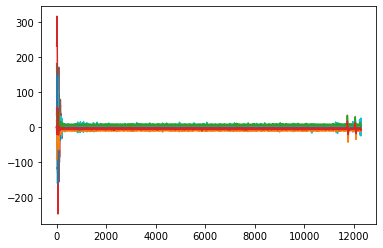

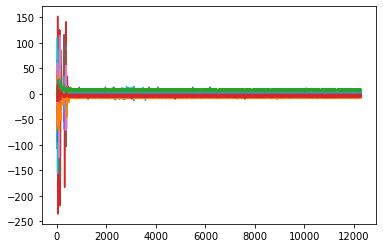

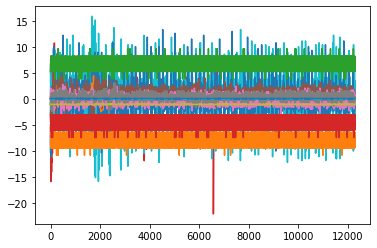

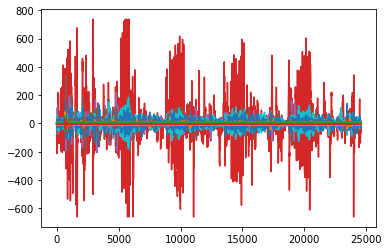

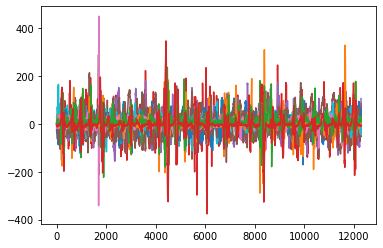

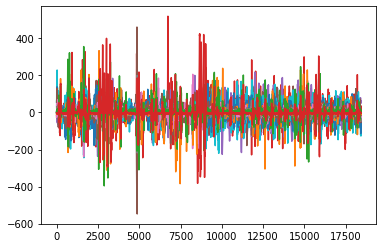

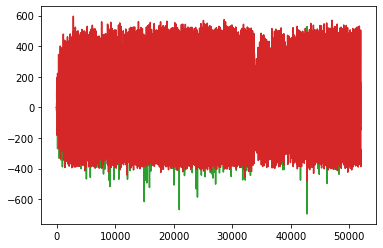

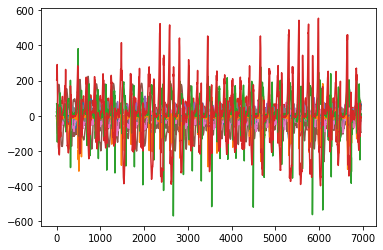

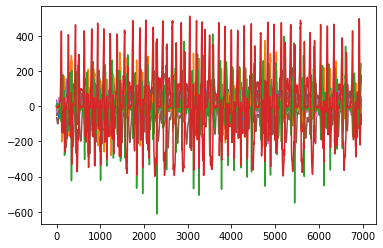

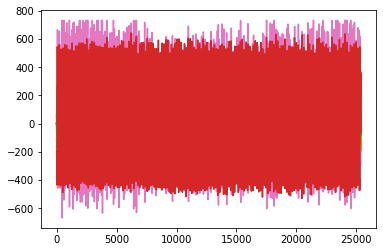

KeyboardInterrupt: 

In [12]:
Visualizing_data()
#below are the visualization according to the data.

In [48]:

def noise_removing():
    df = pd.read_csv('dataset_1.txt', sep=',', header=None)
    # Butterworth low-pass filter. You could try different parameters and other filters. 
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    df_sitting = df[df[24] == 1].values
    for i in range(3):
        df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
    plt.plot(df_sitting[:, 0:24])
    plt.show()

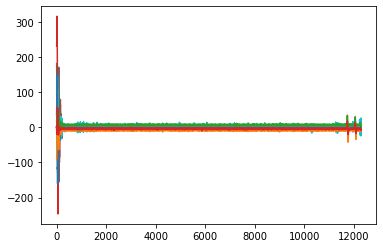

In [49]:
noise_removing()

In [7]:

def Feature_Extraction():
    
    training = np.empty(shape=(0, 37))
    testing = np.empty(shape=(0, 37))
    
    # recognizing the data from the data setand storing it.
    df = pd.read_csv("dataset_1.txt",sep = ',',header=None)
    
    activity_data = df[df[24]==2].values
    
    
    for i in range(1,19):
        df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
       
        # Appending the data below.
        activity_data = np.append(activity_data,df[df[24]== 7].values, axis=0) # for walking
        # low pass filter applied below
        b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')
       
        for j in range(24):
            activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
    
    # Data length
    datat_len = len(activity_data)
   
    training_len = math.floor(datat_len * 0.8)
    # Storage of data
    training_data = activity_data[:training_len, :]
    # removal of data(required)
    testing_data = activity_data[training_len:, :]
    
    # Calculating with sample number
    training_sample_number = training_len // 800 +1
    testing_sample_number = (datat_len - training_len) // 800 + 1

    for i in range(training_sample_number):
        if i < training_sample_number-1:
            sample_data = training_data[800*i:800*(i+1),:]
        else: sample_data= training_data[800*i:,:]
    
    
    feature_sample = []
    feature_sample = np.array([feature_sample])
    # WRIST-Appending
   
    for i in range(3):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    feature_sample = np.array([feature_sample])
                
    # CHEST-Appending
    
    for i in range(6,9):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    # HIPS-Appending
    for i in range(12,15):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    # ANKLE-Appending
    for i in range(18,21):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    feature_sample= np.append(feature_sample,sample_data[0, -1])
    feature_sample = np.array([feature_sample])
    training = np.append(training, feature_sample,axis=0)
    
    
    sample_data = []
    for s in range(testing_sample_number):
        if s < training_sample_number - 1:
            sample_data = testing_data[800*s:800*(s + 1), :]
        else:
            sample_data = testing_data[800*s:, :]

        
    """Testing data"""
    # Below are the feature sample 
    feature_sample = []
    feature_sample = np.array([feature_sample])
    # Sensors required for Wrist 
    for i in range(3):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))
            
    # Sensors required for Chest 
    for i in range(6,9):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))
    
    # Sensors required for Hips  
    for i in range(12,15):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    # Sensors required for Ankle 
    for i in range(18,21):
        feature_sample= np.append(feature_sample,np.min(sample_data[:, i]))
        feature_sample = np.append(feature_sample,np.max(sample_data[:, i]))
        feature_sample= np.append(feature_sample,np.mean(sample_data[:, i]))

    feature_sample= np.append(feature_sample,sample_data[0, -1])
    feature_sample = np.array([feature_sample])
    testing = np.append(training, feature_sample,axis=0)
    
    
    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)

In [50]:
Feature_Extraction()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [55]:
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[36].values
  
    y_train = y_train - 1
    df_training = df_training.drop([36], axis=1)
    X_train = df_training.values

    y_test = df_testing[36].values
    y_test = y_test - 1
    df_testing = df_testing.drop([36], axis=1)
    X_test = df_testing.values





In [56]:
# Declaring the KNN algorithem 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [57]:
y_pred = knn.predicted(X_test)
results = confusion_matrix(actual, predicted) 
# Declaring the confusion matrix 
print ('Confusion Matrix :')
print(results) 
print 'Accuracy Score :',accuracy_score(actual, predicted) 
# print the final report
print 'Report : '
print classification_report(actual, predicted)

SyntaxError: invalid syntax (<ipython-input-57-c56f14f728b4>, line 5)

In [ ]:
  tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                    {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
